In [1]:
import pandas as pd
import numpy as np
import sys
import statsmodels.api as sm
import statsmodels.formula.api as smf
#pd.set_option('display.width', 5000) 
#pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

pd.options.mode.chained_assignment = None  # default='warn'

my_dpi=72

print('This is loaded')

This is loaded


In [2]:
#base = pd.read_csv('rc15csv/pai2015before.csv', thousands=",", index_col='schid')
base = pd.read_csv('rc15csv/tim2015data.csv', thousands=",", index_col='schid')
base.shape

(4094, 54)

In [3]:
#hsval = ['CHARTER HIGH SCH+','CHARTER NET HIGH SCH+','HIGH SCHOOL+']
HSval = ['CHARTER NET','CHARTER NET SCH','CHARTER HIGH SCH+','CHARTER NET HIGH SCH+','HIGH SCHOOL+']
HSbase = base[~base.schooltype.isin(HSval)]
HSbase.shape

(3997, 54)

In [4]:
hsvalue = ['']
hsbase = HSbase[~HSbase.zelemscore2015.isin(hsvalue)]
hsbase.shape

(3997, 54)

In [5]:
hsbase['MEapp'] = hsbase['me2015schoolHS'] + hsbase['me2015schAPP']
hsbase.shape

(3997, 55)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     412.2
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           2.65e-70
Time:                        14:19:38   Log-Likelihood:                -2527.8
No. Observations:                 608   AIC:                             5060.
Df Residuals:                     606   BIC:                             5068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     76.0614      1.364     55.751      0.000        73.382    78.741
x             -0.5039      0.025    -20.302      0.000        -0.553    -0.455
==============================================================================
Omnibus:                        2.648   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                2.819
Skew:                          -0.028   Prob(JB):                        0.244
Kurtosis:                       3.329   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

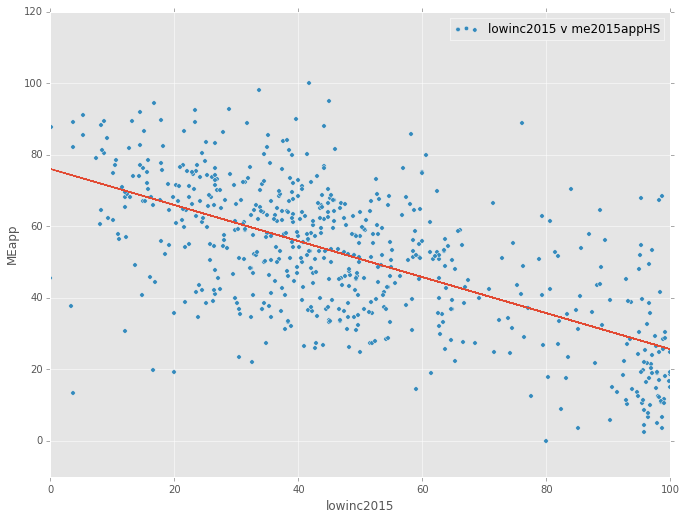

In [6]:
x = hsbase['lowinc2015']
y = hsbase['MEapp']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=hsbase).fit()

hsbase.plot(kind='scatter', x='lowinc2015', y='MEapp',label="lowinc2015 v me2015appHS", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     673.9
Date:                Tue, 15 Dec 2015   Prob (F-statistic):          3.59e-100
Time:                        14:19:47   Log-Likelihood:                -2433.2
No. Observations:                 602   AIC:                             4870.
Df Residuals:                     600   BIC:                             4879.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.6792      1.629      7.171      0.000         8.481    14.878
x              0.7870      0.030     25.960      0.000         0.727     0.847
==============================================================================
Omnibus:                       28.160   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.115
Skew:                          -0.389   Prob(JB):                     1.18e-09
Kurtosis:                       4.017   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

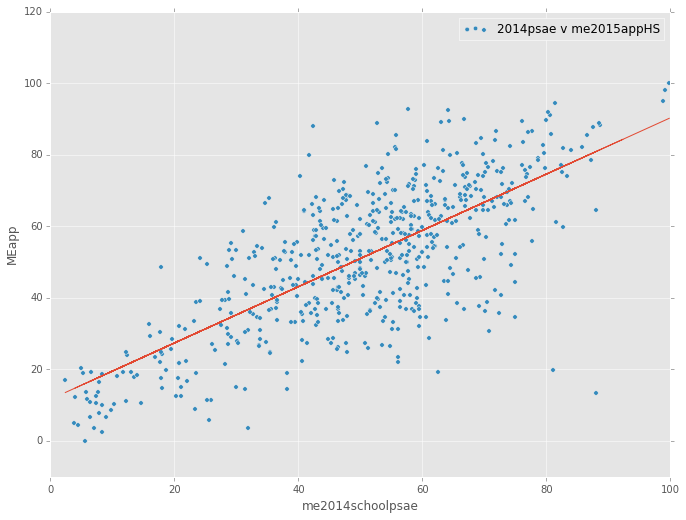

In [7]:
x = hsbase['me2014schoolpsae']
y = hsbase['MEapp']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=hsbase).fit()

hsbase.plot(kind='scatter', x='me2014schoolpsae', y='MEapp',label="2014psae v me2015appHS", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     36.01
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           2.16e-09
Time:                        14:20:12   Log-Likelihood:                -11439.
No. Observations:                3522   AIC:                         2.288e+04
Df Residuals:                    3520   BIC:                         2.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     29.5532      0.227    130.386      0.000        29.109    29.998
x             -0.0221      0.004     -6.001      0.000        -0.029    -0.015
==============================================================================
Omnibus:                      270.140   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.120
Skew:                          -0.610   Prob(JB):                     6.49e-89
Kurtosis:                       4.131   Cond. No.                         133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

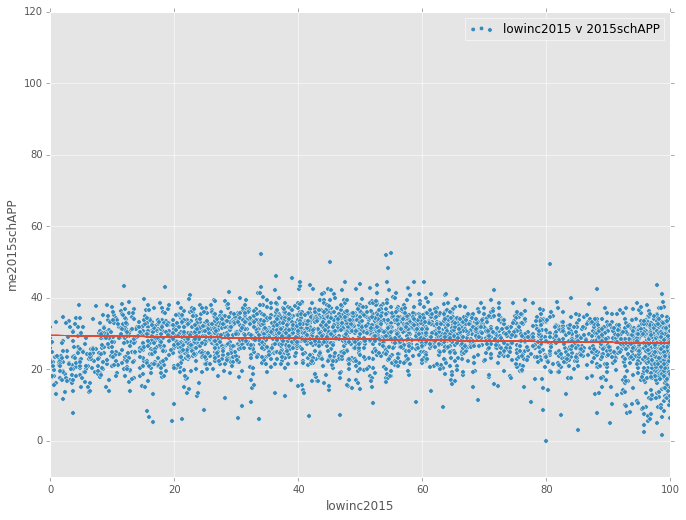

In [9]:
x = hsbase['lowinc2015']
y = hsbase['me2015schAPP']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=hsbase).fit()

hsbase.plot(kind='scatter', x='lowinc2015', y='me2015schAPP',label="lowinc2015 v 2015schAPP", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     57.61
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           1.21e-13
Time:                        14:20:21   Log-Likelihood:                -2123.6
No. Observations:                 608   AIC:                             4251.
Df Residuals:                     606   BIC:                             4260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     22.2791      0.606     36.761      0.000        21.089    23.469
x              0.1538      0.020      7.590      0.000         0.114     0.194
==============================================================================
Omnibus:                       10.979   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.162
Skew:                          -0.253   Prob(JB):                      0.00229
Kurtosis:                       3.473   Cond. No.                         56.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

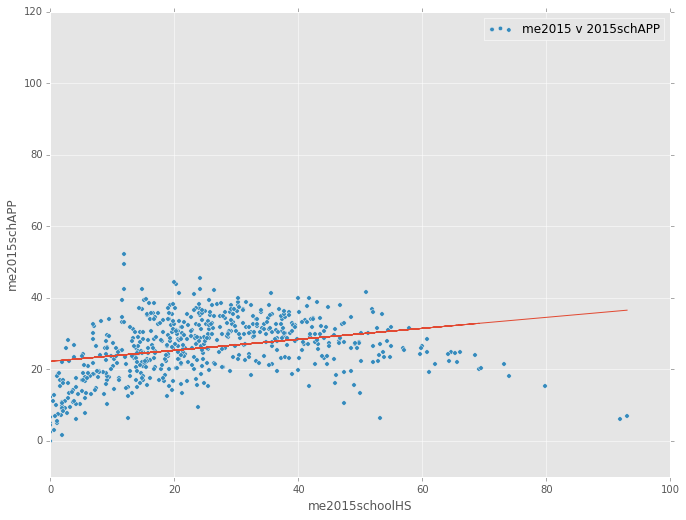

In [10]:
x = hsbase['me2015schoolHS']
y = hsbase['me2015schAPP']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=hsbase).fit()

hsbase.plot(kind='scatter', x='me2015schoolHS', y='me2015schAPP',label="me2015 v 2015schAPP", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()